<a href="https://colab.research.google.com/github/Awalilly/DataMining2023/blob/main/Result_unbalanced_vs_balaced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plot

path_mount = '/content/drive/'

In [ ]:
from google.colab import drive
drive.mount(path_mount)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path_data = '/content/drive/MyDrive/Colab Notebooks/data/DataMiningProject/Results'
subject = ['S1', 'S2', 'S3', 'S4', 'S5']
Results_all_pat = []

for sub in subject:
  file_path = os.path.join(path_mount, path_data, sub)
  Results_all_pat.append(np.load(file_path + "_results.npy"))

In [ ]:
Results_all_pat[0].shape

(32, 5)

In questo notebook si confrontano i risultati ottenuti per ogni paziente. Si sono valutati i migliori modelli con cui sono poi stati costruiti i modelli di ensemble finali (stacking classifiers).

In [ ]:
model = np.zeros(5)
modelli_S1 = []

for modello in range(8):
  for bal in [0, 8, 16, 24]:
    model = np.vstack((model, Results_all_pat[0][modello + bal]))
  model = model.T
  modelli_S1.append(model)
  model = np.zeros(5)

model = np.zeros(5)
modelli_S2 = []

for modello in range(8):
  for bal in [0, 8, 16, 24]:
    model = np.vstack((model, Results_all_pat[1][modello + bal]))
  model = model.T
  modelli_S2.append(model)
  model = np.zeros(5)

model = np.zeros(5)
modelli_S3 = []

for modello in range(8):
  for bal in [0, 8, 16, 24]:
    model = np.vstack((model, Results_all_pat[2][modello + bal]))
  model = model.T
  modelli_S3.append(model)
  model = np.zeros(5)

model = np.zeros(5)
modelli_S4 = []

for modello in range(8):
  for bal in [0, 8, 16, 24]:
    model = np.vstack((model, Results_all_pat[3][modello + bal]))
  model = model.T
  modelli_S4.append(model)
  model = np.zeros(5)

model = np.zeros(5)
modelli_S5 = []

for modello in range(8):
  for bal in [0, 8, 16, 24]:
    model = np.vstack((model, Results_all_pat[4][modello + bal]))
  model = model.T
  modelli_S5.append(model)
  model = np.zeros(5)


In [ ]:
Metriche = ['Roc_auc', 'Accuracy', 'F1_score', 'precision', 'recall']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)

# S1

## Risultati S1 dati balanced VS unbalanced

### *1. Logistic Regression*

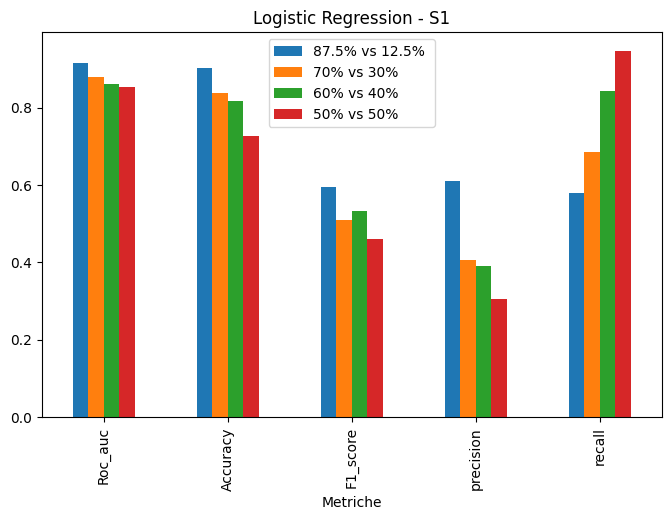

In [ ]:
columns = ["Metriche", "87.5% vs 12.5% ", "70% vs 30% ", "60% vs 40%", "50% vs 50%"]
m = pd.DataFrame(Metriche, columns = ['Metriche'])

LR = pd.DataFrame(modelli_S1[0], columns = columns)
LR.Metriche = m.Metriche

LR.plot(x = columns[0], y = columns[1:], kind = "bar", figsize=(8,5))

plot.title("Logistic Regression - S1")

# Display the plot
plot.show()

### *2. Random Forest*

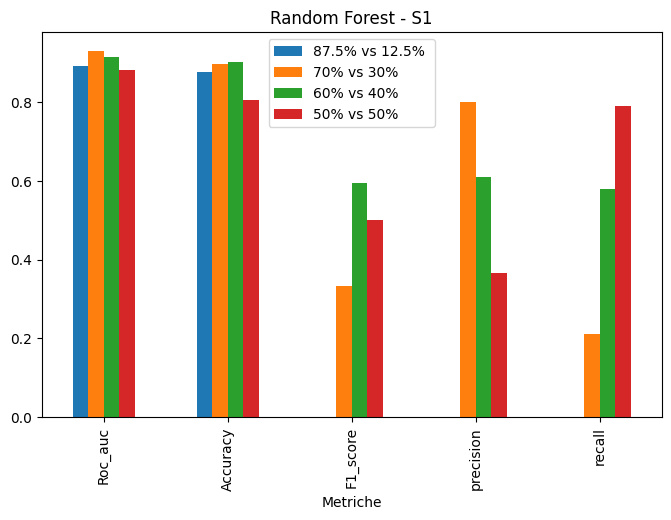

In [ ]:
RF = pd.DataFrame(modelli_S1[1], columns = columns)
RF.Metriche = m.Metriche
RF.plot(x = columns[0], y = columns[1:], kind = "bar", figsize=(8,5))

plot.title("Random Forest - S1")
# Display the plot
plot.show()

### *3. Multinomial Naive Bayes*

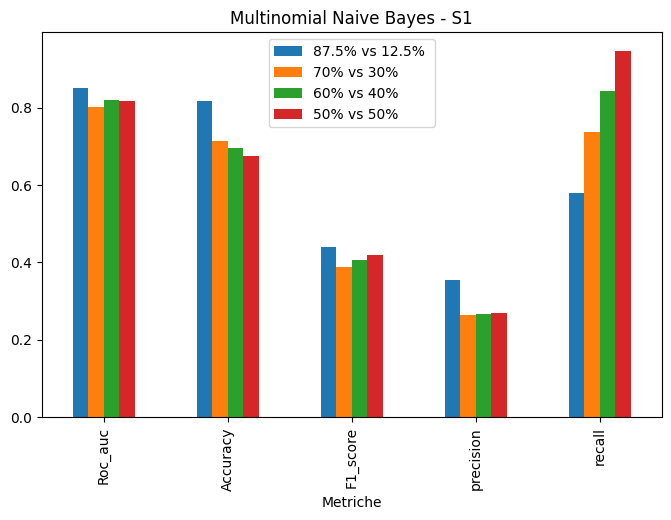

In [ ]:
NBM = pd.DataFrame(modelli_S1[2], columns = columns )
NBM.Metriche = m.Metriche
NBM.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Multinomial Naive Bayes - S1")
# Display the plot
plot.show()

### *4. Complement Naive Bayes*

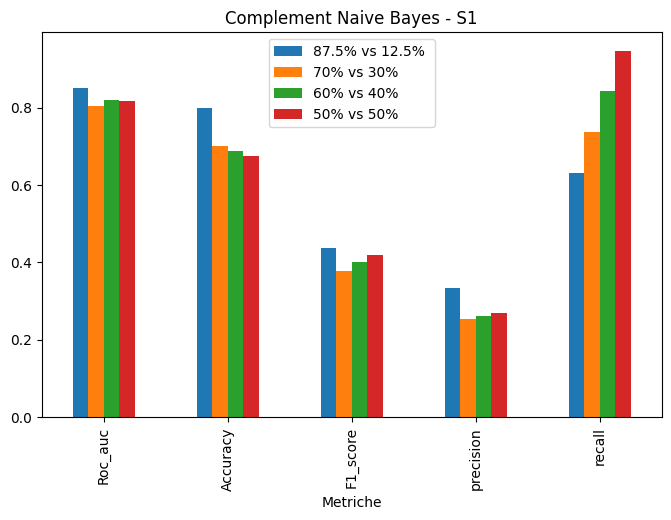

In [ ]:
NBC = pd.DataFrame(modelli_S1[3], columns = columns )
NBC.Metriche = m.Metriche
NBC.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Complement Naive Bayes - S1")

# Display the plot
plot.show()

### *5. Linear SVM*

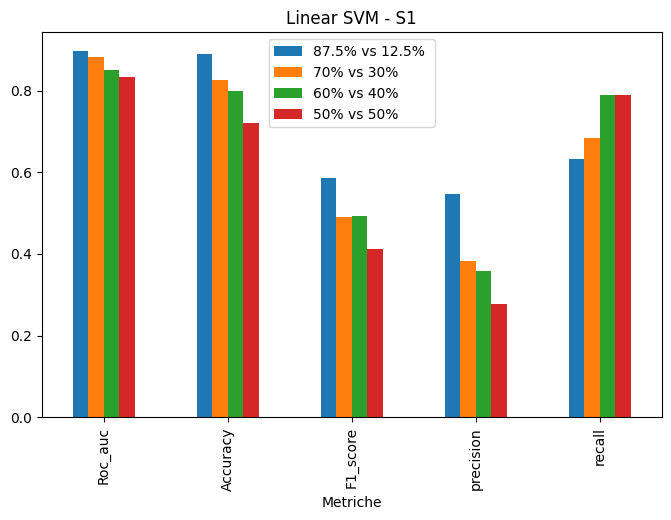

In [ ]:
SVML = pd.DataFrame(modelli_S1[4], columns = columns )
SVML.Metriche = m.Metriche
SVML.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Linear SVM - S1")
# Display the plot
plot.show()

### *6. Polinomial SVM*

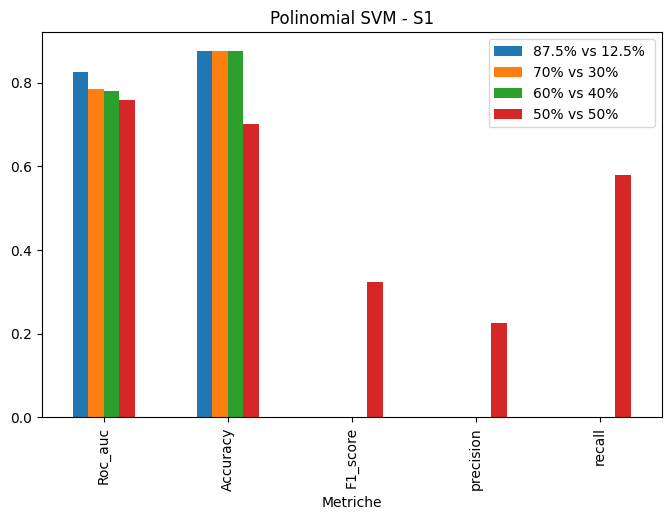

In [ ]:
SVMP = pd.DataFrame(modelli_S1[5], columns = columns)
SVMP.Metriche = m.Metriche
SVMP.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))
plot.title("Polinomial SVM - S1")
# Display the plot
plot.show()

### *7. RBF SVM*

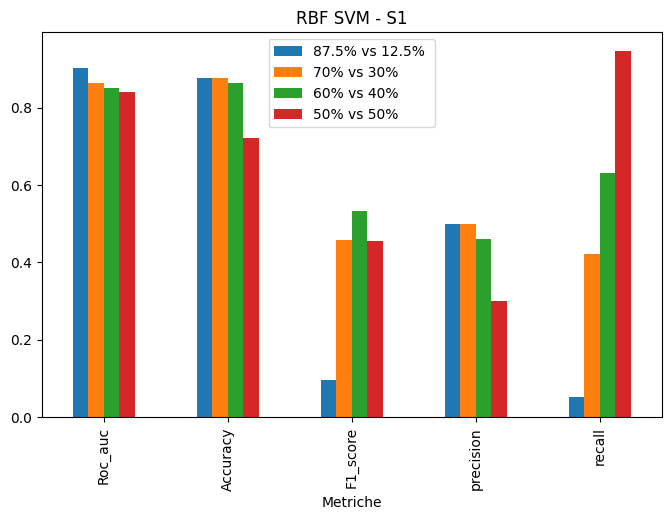

In [ ]:
SVMR = pd.DataFrame(modelli_S1[6], columns = columns)
SVMR.Metriche = m.Metriche
SVMR.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))
plot.title("RBF SVM - S1")
# Display the plot
plot.show()

### *8. LDA*

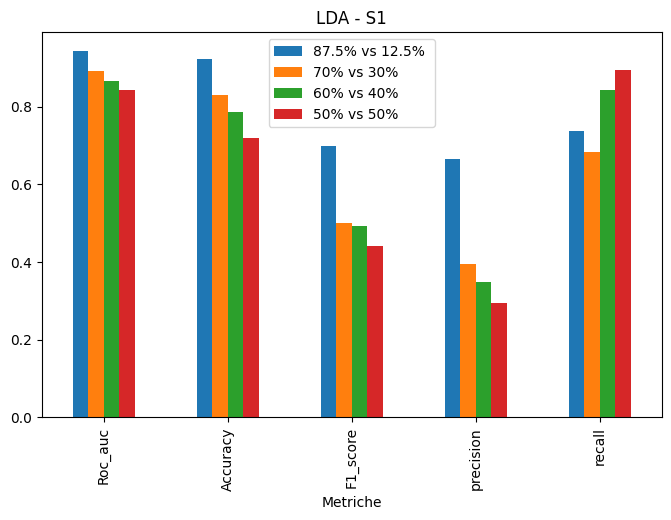

In [ ]:
LDA = pd.DataFrame(modelli_S1[7], columns = columns )
LDA.Metriche = m.Metriche
LDA.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))
plot.title("LDA - S1")
# Display the plot
plot.show()

##S1 Ensemble

### Definizione Dataset

In [ ]:
subject = "S1"
path_data = "MyDrive/Colab Notebooks/data/DataMiningProject/Preprocessed/"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")

unicorn_channels = ["Fz", "C3", "Cz", "C4", "Pz", "PO7", "Oz", "PO8"]
pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

X = X[1:,:]

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

X_train88 = X_train_original
y_train88 = y_train_original

undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train70, y_train70 = undersampler.fit_resample(X_train_original, y_train_original)

undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_train50, y_train50 = undersampler.fit_resample(X_train_original, y_train_original)

In [ ]:
X_val.shape

(154, 2808)

### Stacking Classifier

In [ ]:
S1_LR88 = LogisticRegression(C = 0.102, max_iter = 1000)
S1_SVM_l88 = SVC(C = 0.10110909090909091, kernel = 'linear',class_weight = "balanced", random_state = 42, probability = True)
S1_LDA88 = LinearDiscriminantAnalysis(shrinkage =  0.77777778, solver = 'lsqr')
S1_RF70 = RandomForestClassifier(n_estimators = 850, criterion = 'gini')
S1_SVM_r50 = SVC(C = 1.9473684210526314, kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

S1_LR88.fit(X_train88, y_train88)
S1_SVM_l88.fit(X_train88, y_train88)
S1_LDA88.fit(X_train88, y_train88)
S1_RF70.fit(X_train70, y_train70)
S1_SVM_r50.fit(X_train50, y_train50)

SVC(C=1.9473684210526314, class_weight='balanced', probability=True,
    random_state=42)

In [ ]:
stacking = [
    ('LR88', S1_LR88),
    ('SVM_l88', S1_SVM_l88),
    ('LDA88', S1_LDA88),
    ('RF70', S1_RF70),
    ('SVM_r50', S1_SVM_r50)
]

S1_stack = StackingClassifier(estimators = stacking, final_estimator = LogisticRegression(), cv = "prefit")
S1_stack.fit(X_val, y_val)

StackingClassifier(cv='prefit',
                   estimators=[('LR88',
                                LogisticRegression(C=0.102, max_iter=1000)),
                               ('SVM_l88',
                                SVC(C=0.10110909090909091,
                                    class_weight='balanced', kernel='linear',
                                    probability=True, random_state=42)),
                               ('LDA88',
                                LinearDiscriminantAnalysis(shrinkage=0.77777778,
                                                           solver='lsqr')),
                               ('RF70',
                                RandomForestClassifier(n_estimators=850)),
                               ('SVM_r50',
                                SVC(C=1.9473684210526314,
                                    class_weight='balanced', probability=True,
                                    random_state=42))],
                   final_estimator=LogisticRegression())

ROC AUC: 0.9795364891518739
Accuracy: 0.9481865284974094
F1-score: 0.7727272727272727
Precision: 0.85
Recall: 0.7083333333333334


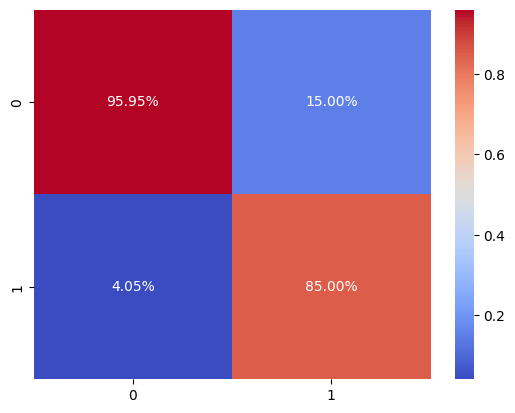

In [ ]:
y_pred_prob = S1_stack.predict_proba(X_test)[0:,1]
y_pred = S1_stack.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred, labels = S1_stack.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

#S2

## Risultati S2 dati balanced VS unbalanced

### *1. Logistic Regression*

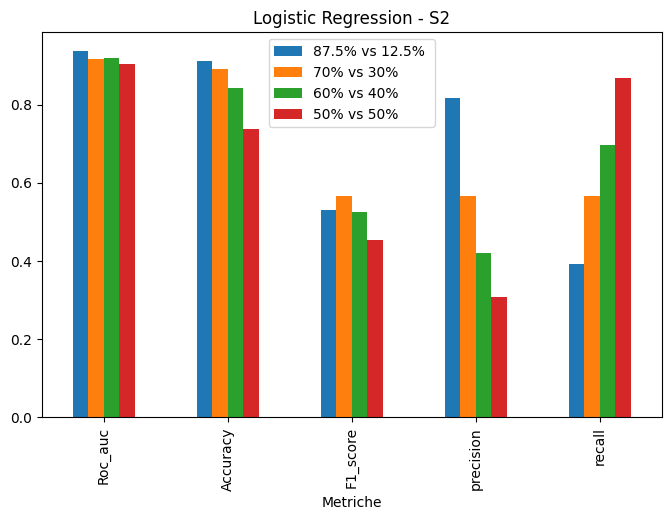

In [ ]:
LR = pd.DataFrame(modelli_S2[0], columns = columns)
LR.Metriche = m.Metriche
LR.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Logistic Regression - S2")
plot.show()

### *2. Random Forest*

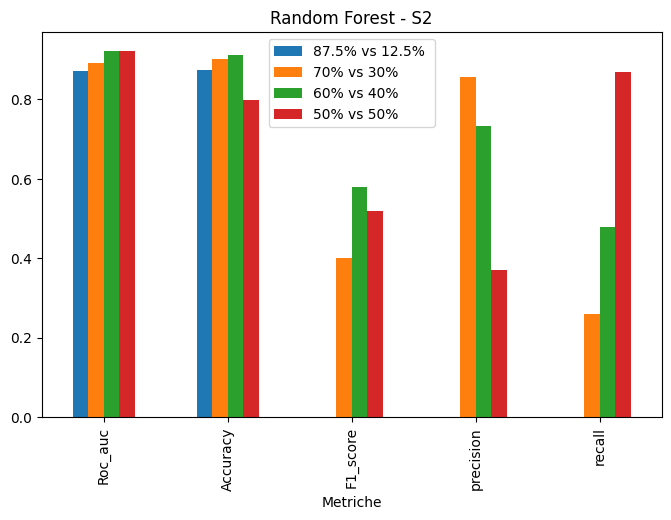

In [ ]:
RF = pd.DataFrame(modelli_S2[1], columns = columns)
RF.Metriche = m.Metriche
RF.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Random Forest - S2")
plot.show()

### *3. Multinomial Naive Bayes*

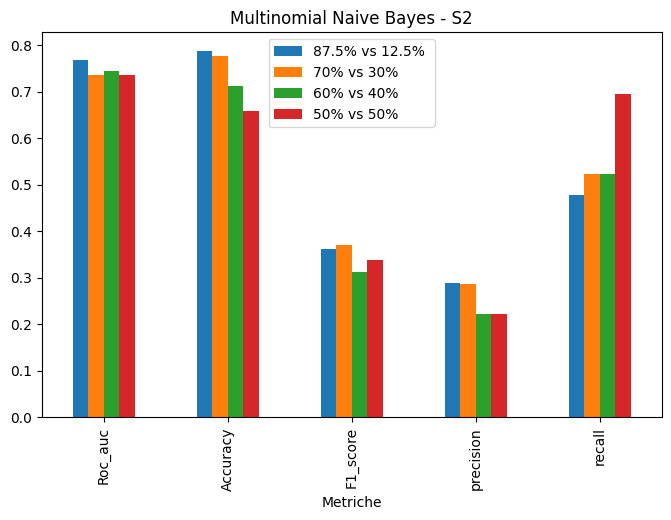

In [ ]:
NBM = pd.DataFrame(modelli_S2[2], columns = columns)
NBM.Metriche = m.Metriche
NBM.plot(x = columns[0], y = columns[1:], kind = "bar", figsize=(8,5))

plot.title("Multinomial Naive Bayes - S2")
plot.show()

### *4. Complement Naive Bayes*

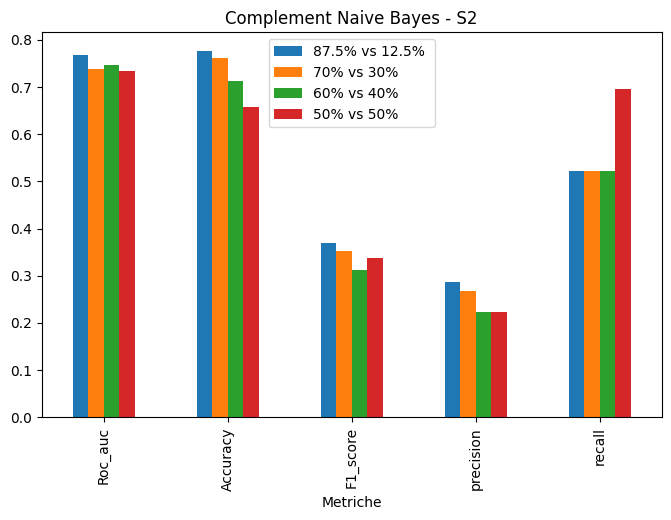

In [ ]:
NBC = pd.DataFrame(modelli_S2[3], columns = columns)
NBC.Metriche = m.Metriche
NBC.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Complement Naive Bayes - S2")
plot.show()

### *5. Linear SVM*

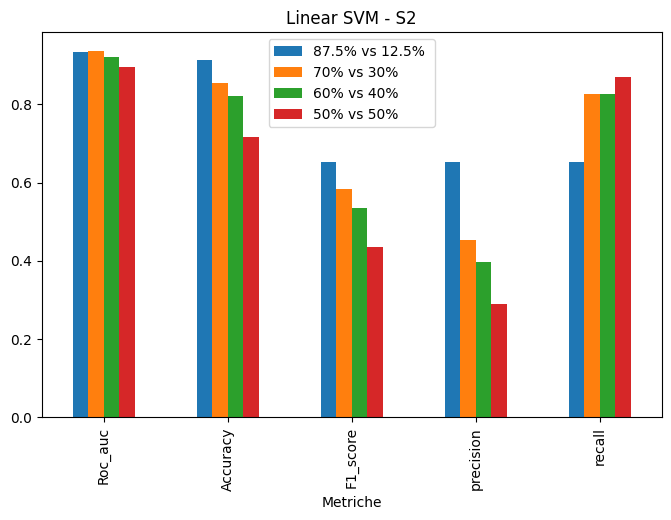

In [ ]:
SVML = pd.DataFrame(modelli_S2[4], columns = columns)
SVML.Metriche = m.Metriche
SVML.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Linear SVM - S2")
plot.show()

### *6. Polinomial SVM*

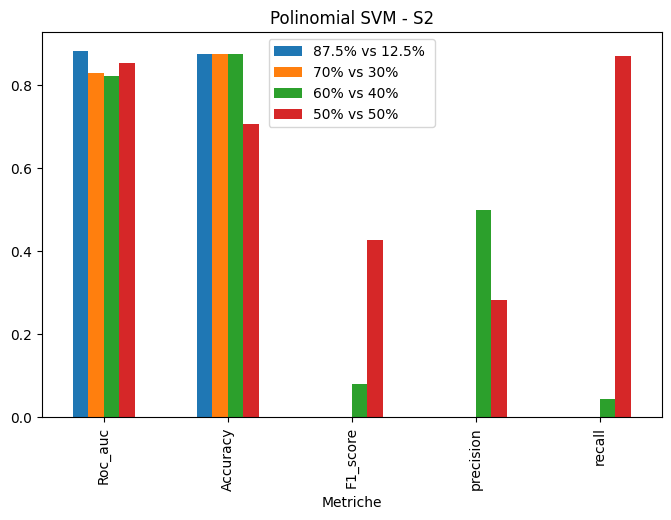

In [ ]:
SVMP = pd.DataFrame(modelli_S2[5], columns = columns )
SVMP.Metriche = m.Metriche
SVMP.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Polinomial SVM - S2")
plot.show()

### *7. RBF SVM*

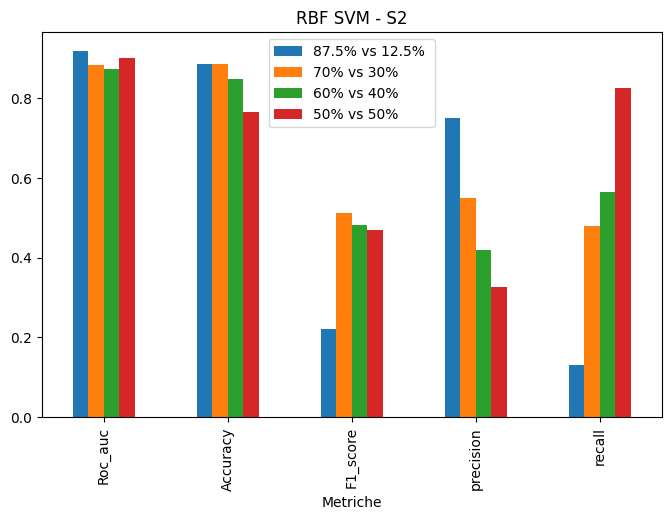

In [ ]:
SVMR = pd.DataFrame(modelli_S2[6], columns = columns)
SVMR.Metriche = m.Metriche
SVMR.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("RBF SVM - S2")
plot.show()

### *8. LDA*

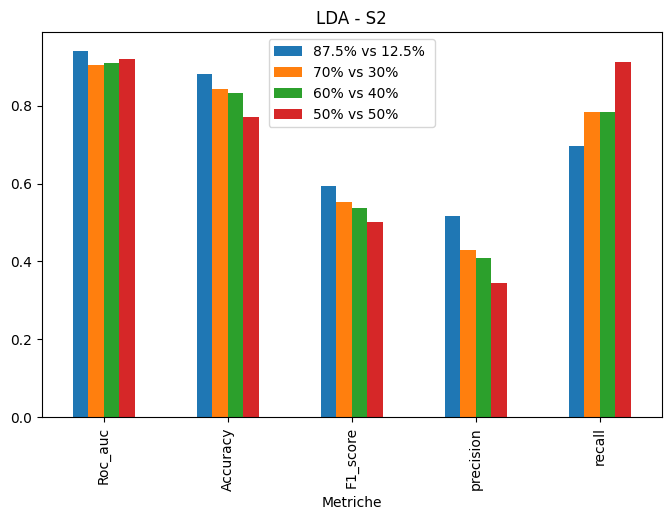

array([[0.        , 0.94139887, 0.90332163, 0.90912773, 0.91979476],
       [0.        , 0.88043478, 0.8423913 , 0.83152174, 0.77173913],
       [0.        , 0.59259259, 0.55384615, 0.53731343, 0.5       ],
       [0.        , 0.51612903, 0.42857143, 0.40909091, 0.3442623 ],
       [0.        , 0.69565217, 0.7826087 , 0.7826087 , 0.91304348]])

In [ ]:
LDA = pd.DataFrame(modelli_S2[7], columns = columns)
LDA.Metriche = m.Metriche
LDA.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("LDA - S2")
plot.show()
modelli_S2[7]

## S2 Ensemble

### Definizione Dataset

In [ ]:
subject = "S2"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")

pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

X = X[1:,:]

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

X_train88 = X_train_original
y_train88 = y_train_original

undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train70, y_train70 = undersampler.fit_resample(X_train_original, y_train_original)

undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_train50, y_train50 = undersampler.fit_resample(X_train_original, y_train_original)

### Stacking Classifier

In [ ]:
S2_LR88 = LogisticRegression(C = 0.004091428571428571, max_iter = 1000)
S2_SVM_l88 = SVC(C = 0.0024587755102040815, kernel = 'linear', class_weight = "balanced", random_state = 42, probability = True)
S2_SVM_r88 = SVC(C = 3.1052631578947367, kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)
S2_LDA88 = LinearDiscriminantAnalysis(shrinkage =  0.885, solver = 'lsqr')

S2_LR70 = LogisticRegression(C = 0.004091428571428571, max_iter = 1000)
S2_SVM_l70 = SVC(C = 0.00203010101010101, kernel = 'linear', class_weight = "balanced", random_state = 42, probability = True)
S2_RF70 = RandomForestClassifier(n_estimators = 800, criterion = 'gini')

S2_LR50 = LogisticRegression(C = 1.2424242424242424, max_iter = 1000)
S2_LDA50 = LinearDiscriminantAnalysis(shrinkage =  0.7500000025, solver = 'lsqr')



S2_LR88.fit(X_train88, y_train88)
S2_SVM_l88.fit(X_train88, y_train88)
S2_SVM_r88.fit(X_train88, y_train88)
S2_LDA88.fit(X_train88, y_train88)

S2_LR70.fit(X_train70, y_train70)
S2_SVM_l70.fit(X_train70, y_train70)
S2_RF70.fit(X_train70, y_train70)

S2_LR50.fit(X_train50, y_train50)
S2_LDA50.fit(X_train50, y_train50)

LinearDiscriminantAnalysis(shrinkage=0.7500000025, solver='lsqr')

In [ ]:
stacking = [
    ('LR88', S2_LR88),
    ('SVM_l88', S2_SVM_l88),
    ('SVM_r88', S2_SVM_r88),
    ('LDA88', S2_LDA88),
    ('LR70', S2_LR70),
    ('SVM_l70', S2_SVM_l70),
    ('RF70', S2_RF70),
    ('LR50', S2_LR50),
    ('LDA50', S2_LDA50)
]

S2_stack = StackingClassifier(estimators = stacking, final_estimator = LogisticRegression(), cv = "prefit")
S2_stack.fit(X_val, y_val)

StackingClassifier(cv='prefit',
                   estimators=[('LR88',
                                LogisticRegression(C=0.004091428571428571,
                                                   max_iter=1000)),
                               ('SVM_l88',
                                SVC(C=0.0024587755102040815,
                                    class_weight='balanced', kernel='linear',
                                    probability=True, random_state=42)),
                               ('SVM_r88',
                                SVC(C=3.1052631578947367,
                                    class_weight='balanced', probability=True,
                                    random_state=42)),
                               ('LDA88',
                                LinearDiscriminantAnaly...
                                                   max_iter=1000)),
                               ('SVM_l70',
                                SVC(C=0.00203010101010101,
                                    class_weight='balanced', kernel='linear',
                                    probability=True, random_state=42)),
                               ('RF70',
                                RandomForestClassifier(n_estimators=800)),
                               ('LR50',
                                LogisticRegression(C=1.2424242424242424,
                                                   max_iter=1000)),
                               ('LDA50',
                                LinearDiscriminantAnalysis(shrinkage=0.7500000025,
                                                           solver='lsqr'))],
                   final_estimator=LogisticRegression())

ROC AUC: 0.8522902727740607
Accuracy: 0.9173913043478261
F1-score: 0.5957446808510638
Precision: 0.7777777777777778
Recall: 0.4827586206896552


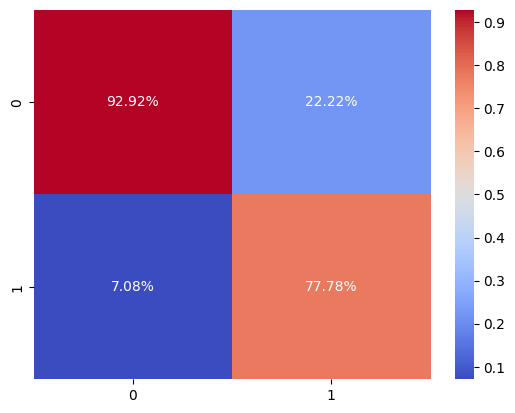

In [ ]:
y_pred_prob = S2_stack.predict_proba(X_test)[0:,1]
y_pred = S2_stack.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred, labels = S2_stack.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# S3

## Risultati S3 dati balanced VS unbalanced

### *1. Logistic Regression*

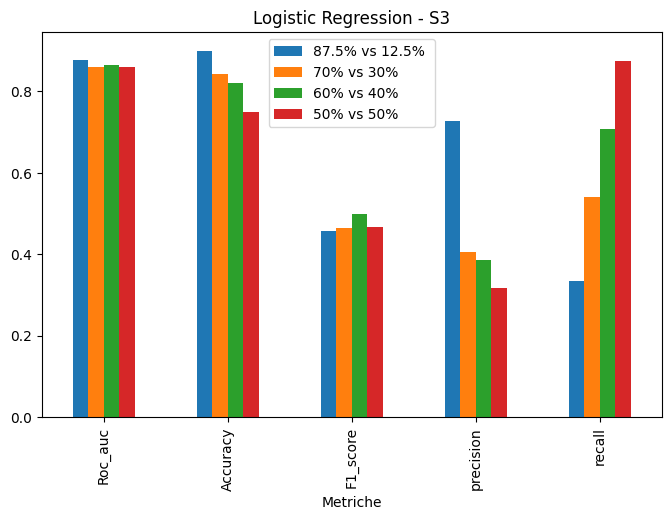

In [ ]:
LR = pd.DataFrame(modelli_S3[0], columns = columns)
LR.Metriche = m.Metriche
LR.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))
plot.title("Logistic Regression - S3")
# Display the plot
plot.show()

### *2. Random Forest*

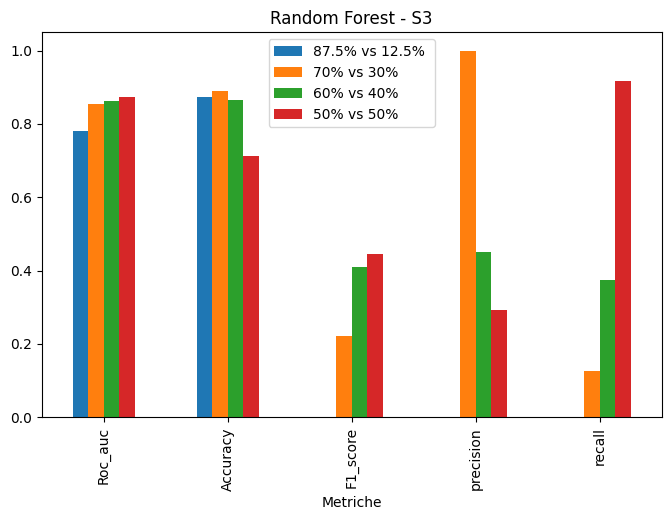

In [ ]:
RF = pd.DataFrame(modelli_S3[1], columns = columns)
RF.Metriche = m.Metriche
RF.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Random Forest - S3")
plot.show()

### *3. Multinomial Naive Bayes*

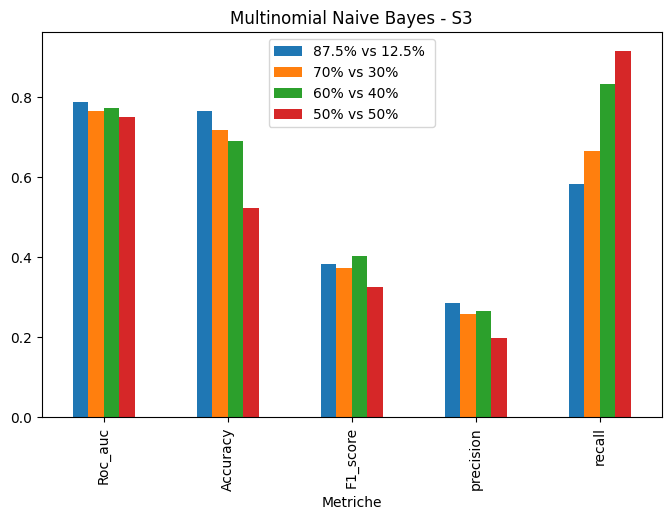

In [ ]:
NBM = pd.DataFrame(modelli_S3[2], columns = columns )
NBM.Metriche = m.Metriche
NBM.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Multinomial Naive Bayes - S3")
plot.show()

### *4. Complement Naive Bayes*

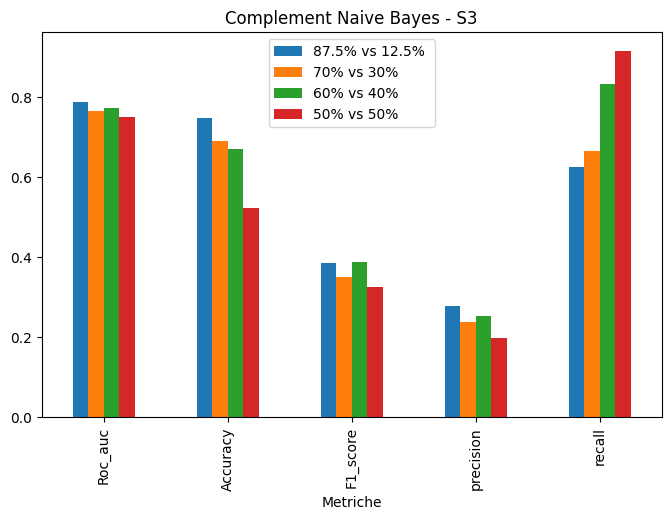

In [ ]:
NBC = pd.DataFrame(modelli_S3[3], columns = columns )
NBC.Metriche = m.Metriche
NBC.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Complement Naive Bayes - S3")
plot.show()

### *5. Linear SVM*

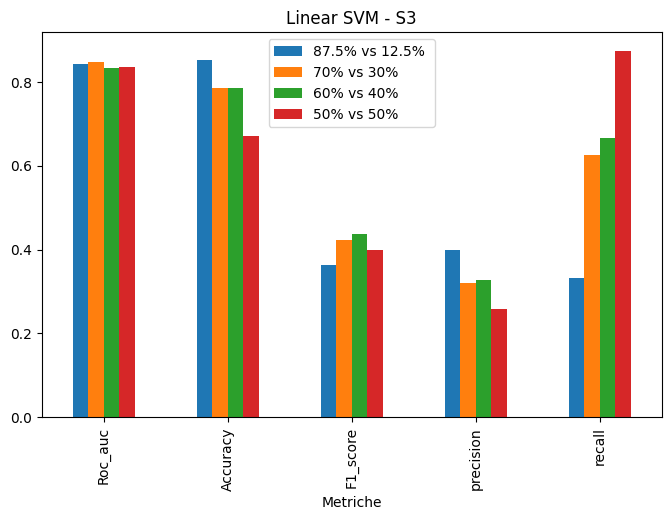

In [ ]:
SVML = pd.DataFrame(modelli_S3[4], columns = columns )
SVML.Metriche = m.Metriche
SVML.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Linear SVM - S3")
plot.show()

### *6. Polinomial SVM*

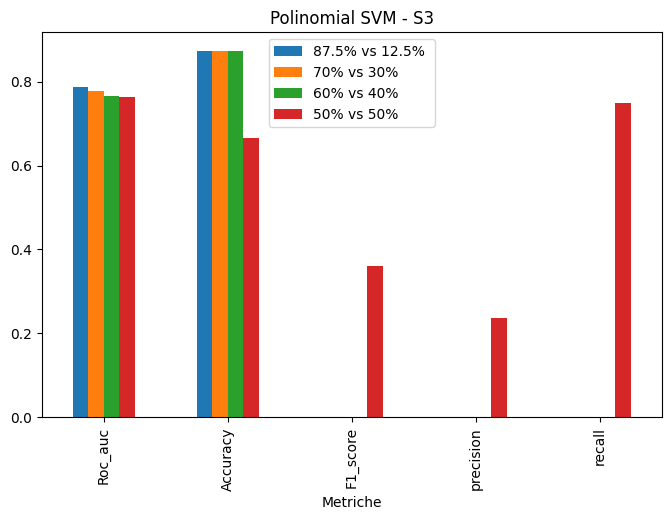

In [ ]:
SVMP = pd.DataFrame(modelli_S3[5], columns = columns )
SVMP.Metriche = m.Metriche
SVMP.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Polinomial SVM - S3")
plot.show()

### *7. RBF SVM*

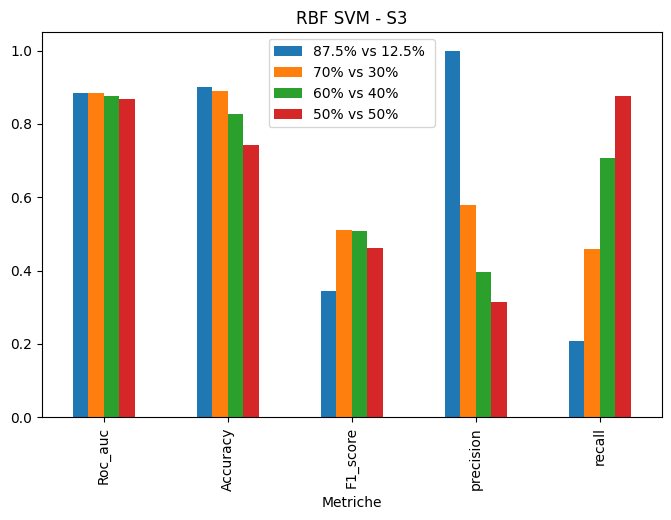

In [ ]:
SVMR = pd.DataFrame(modelli_S3[6], columns = columns)
SVMR.Metriche = m.Metriche
SVMR.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("RBF SVM - S3")
plot.show()

### *8. LDA*

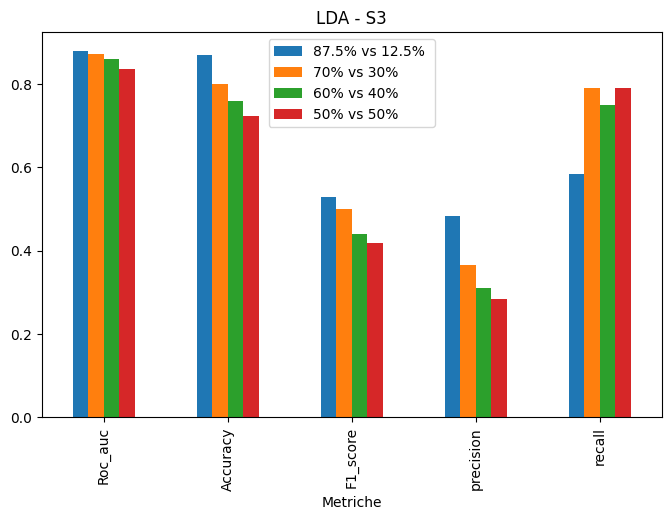

In [ ]:
LDA = pd.DataFrame(modelli_S3[7], columns = columns )
LDA.Metriche = m.Metriche
LDA.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("LDA - S3")
plot.show()

## S3 Ensemble

### Definizione Dataset

In [ ]:
subject = "S3"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")

pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

X = X[1:,:]

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

X_train88 = X_train_original
y_train88 = y_train_original

undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train70, y_train70 = undersampler.fit_resample(X_train_original, y_train_original)

undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_train50, y_train50 = undersampler.fit_resample(X_train_original, y_train_original)

###Stacking Classifier

In [ ]:
S3_LR88 = LogisticRegression(C = 0.004342857142857144, max_iter = 1000)
S3_SVM_r88 = SVC(C = 2.6315789473684212, kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)

S3_RF70 = RandomForestClassifier(n_estimators = 800, criterion = 'gini')

S3_SVM_l50 = SVC(C = 1e-4, kernel = "linear", class_weight = "balanced", random_state = 42, probability = True)


S3_LR88.fit(X_train88, y_train88)
S3_SVM_r88.fit(X_train88, y_train88)

S3_RF70.fit(X_train70, y_train70)

S3_SVM_l50.fit(X_train50, y_train50)

SVC(C=0.0001, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

In [ ]:
stacking = [
    ('LR88', S3_LR88),
    ('SVM_r88', S3_SVM_r88),
    ('RF70', S3_RF70),
    ('SVM_l50', S3_SVM_l50)
]

S3_stack = StackingClassifier(estimators = stacking, final_estimator = LogisticRegression(), cv = "prefit")
S3_stack.fit(X_val, y_val)

StackingClassifier(cv='prefit',
                   estimators=[('LR88',
                                LogisticRegression(C=0.004342857142857144,
                                                   max_iter=1000)),
                               ('SVM_r88',
                                SVC(C=2.6315789473684212,
                                    class_weight='balanced', probability=True,
                                    random_state=42)),
                               ('RF70',
                                RandomForestClassifier(n_estimators=800)),
                               ('SVM_l50',
                                SVC(C=0.0001, class_weight='balanced',
                                    kernel='linear', probability=True,
                                    random_state=42))],
                   final_estimator=LogisticRegression())

ROC AUC: 0.7774038461538462
Accuracy: 0.907563025210084
F1-score: 0.47619047619047616
Precision: 0.8333333333333334
Recall: 0.3333333333333333


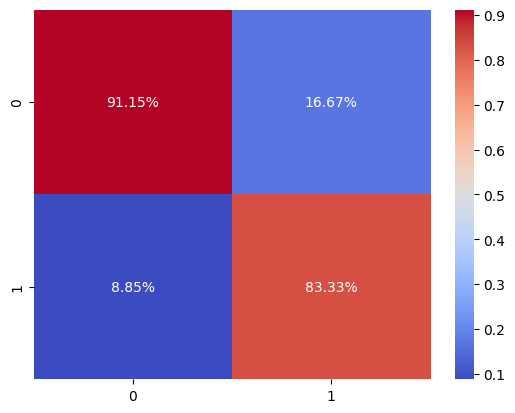

In [ ]:
y_pred_prob = S3_stack.predict_proba(X_test)[0:,1]
y_pred = S3_stack.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred, labels = S3_stack.classes_)

cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

#S4

## Risultati S4 dati balanced VS unbalanced

### *1. Logistic Regression*

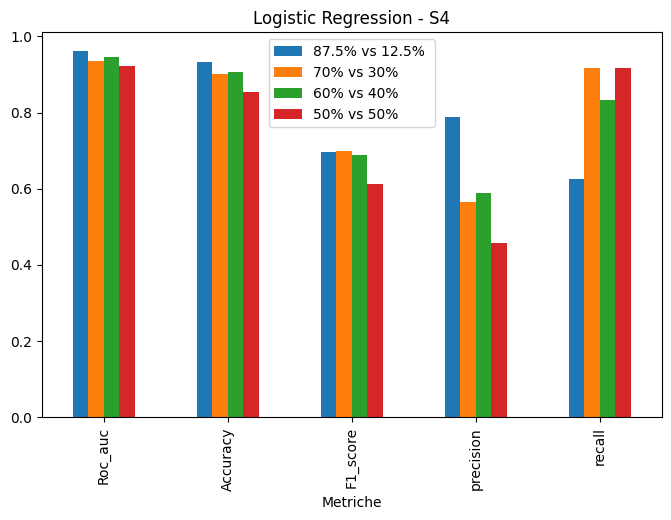

In [ ]:
LR = pd.DataFrame(modelli_S4[0], columns = columns)
LR.Metriche = m.Metriche
LR.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Logistic Regression - S4")
plot.show()

### *2. Random Forest*

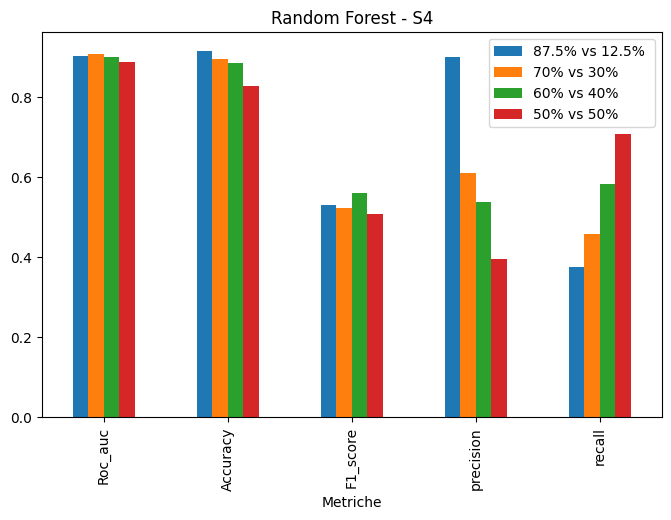

In [ ]:
RF = pd.DataFrame(modelli_S4[1], columns = columns )
RF.Metriche = m.Metriche
RF.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Random Forest - S4")
plot.show()

### *3. Multinomial Naive Bayes*

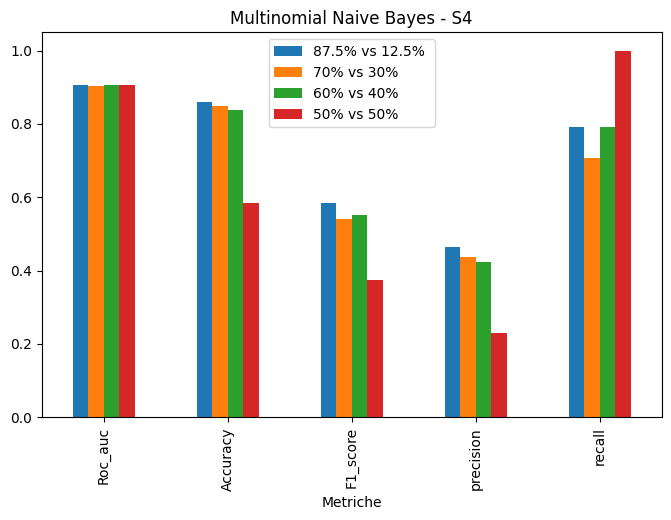

In [ ]:
NBM = pd.DataFrame(modelli_S4[2], columns = columns)
NBM.Metriche = m.Metriche
NBM.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Multinomial Naive Bayes - S4")
plot.show()

### *4. Complement Naive Bayes*

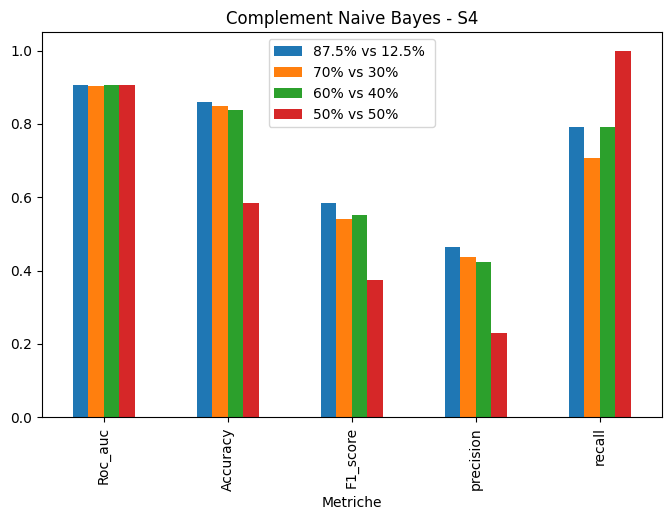

In [ ]:
NBC = pd.DataFrame(modelli_S4[3], columns = columns)
NBC.Metriche = m.Metriche
NBC.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Complement Naive Bayes - S4")
plot.show()

### *5. Linear SVM*

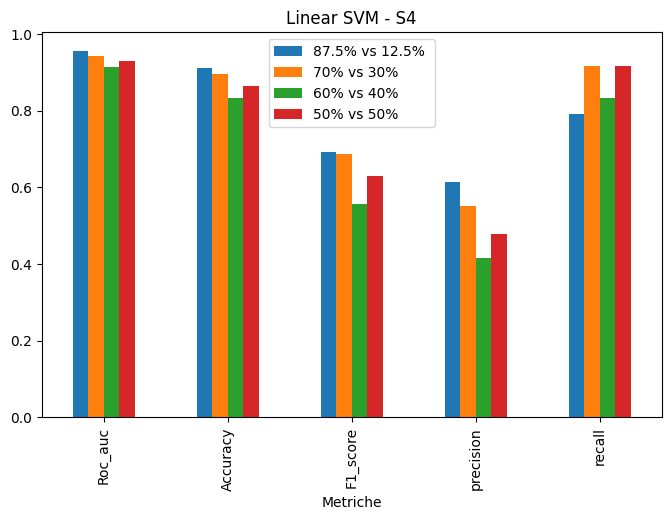

In [ ]:
SVML = pd.DataFrame(modelli_S4[4], columns = columns)
SVML.Metriche = m.Metriche
SVML.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Linear SVM - S4")
plot.show()

### *6. Polinomial SVM*

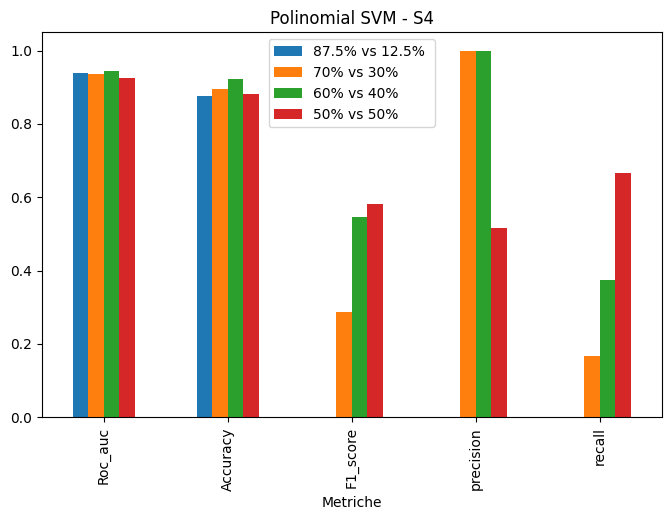

In [ ]:
SVMP = pd.DataFrame(modelli_S4[5], columns = columns )
SVMP.Metriche = m.Metriche
SVMP.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Polinomial SVM - S4")
plot.show()

### *7. RBF SVM*

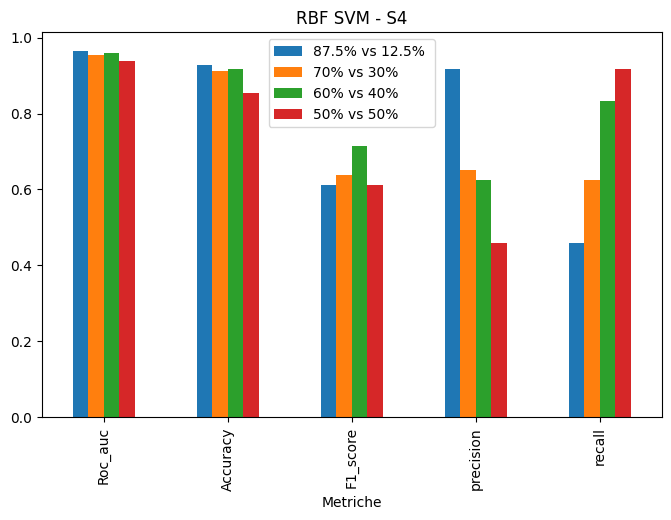

In [ ]:
SVMR = pd.DataFrame(modelli_S4[6], columns = columns)
SVMR.Metriche = m.Metriche
SVMR.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("RBF SVM - S4")
plot.show()

### *8. LDA*

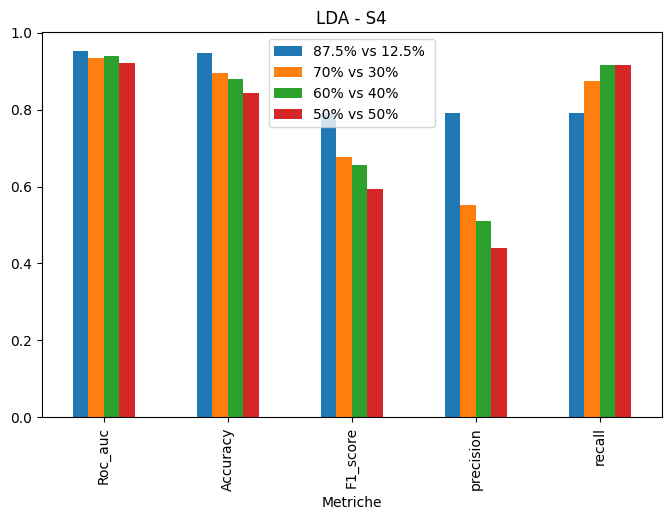

In [ ]:
LDA = pd.DataFrame(modelli_S4[7], columns = columns)
LDA.Metriche = m.Metriche
LDA.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("LDA - S4")
plot.show()

## S4 Ensemble

### Definzione Dataset

In [ ]:
subject = "S4"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")

pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

X = X[1:,:]

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

X_train88 = X_train_original
y_train88 = y_train_original

undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train70, y_train70 = undersampler.fit_resample(X_train_original, y_train_original)

undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state = 42)
X_train60, y_train60 = undersampler.fit_resample(X_train_original, y_train_original)

undersampler = RandomUnderSampler(sampling_strategy = 1, random_state = 42)
X_train50, y_train50 = undersampler.fit_resample(X_train_original, y_train_original)

### Stacking Classifier

In [ ]:
S4_LR88 = LogisticRegression(C = 0.007368423684210527, max_iter = 1000)
S4_RF88 = RandomForestClassifier(n_estimators = 122, criterion = 'gini')
S4_SVM_r88 = SVC(C = 2.0377777777777775, kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)
S4_LDA88 = LinearDiscriminantAnalysis(shrinkage =  0.55, solver = 'lsqr')

S4_SVM_l70 = SVC(C = 0.0006210526315789474, kernel = "linear", class_weight = "balanced", random_state = 42, probability = True)

S4_SVM_p60 = SVC(C = 1.3157894736842106, degree = 3, kernel = "poly", class_weight = "balanced", random_state = 42, probability = True)



S4_LR88.fit(X_train88, y_train88)
S4_SVM_r88.fit(X_train88, y_train88)
S4_RF88.fit(X_train88, y_train88)
S4_LDA88.fit(X_train88, y_train88)

S4_SVM_l70.fit(X_train70, y_train70)

S4_SVM_p60.fit(X_train60, y_train60)

SVC(C=1.3157894736842106, class_weight='balanced', kernel='poly',
    probability=True, random_state=42)

In [ ]:
stacking = [
    ('LR88', S4_LR88),
    ('SVM_r88', S4_SVM_r88),
    ('RF88', S4_RF88),
    ('LDA88', S4_LDA88),
    ('SVM_l70', S4_SVM_l70),
    ('SVM_p60', S4_SVM_p60),
]

S4_stack = StackingClassifier(estimators = stacking, final_estimator = LogisticRegression(), cv = "prefit")
S4_stack.fit(X_val, y_val)

StackingClassifier(cv='prefit',
                   estimators=[('LR88',
                                LogisticRegression(C=0.007368423684210527,
                                                   max_iter=1000)),
                               ('SVM_r88',
                                SVC(C=2.0377777777777775,
                                    class_weight='balanced', probability=True,
                                    random_state=42)),
                               ('RF88',
                                RandomForestClassifier(n_estimators=122)),
                               ('LDA88',
                                LinearDiscriminantAnalysis(shrinkage=0.55,
                                                           solver='lsqr')),
                               ('SVM_l70',
                                SVC(C=0.0006210526315789474,
                                    class_weight='balanced', kernel='linear',
                                    probability=True, random_state=42)),
                               ('SVM_p60',
                                SVC(C=1.3157894736842106,
                                    class_weight='balanced', kernel='poly',
                                    probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

ROC AUC: 0.9173015873015873
Accuracy: 0.9666666666666667
F1-score: 0.846153846153846
Precision: 1.0
Recall: 0.7333333333333333


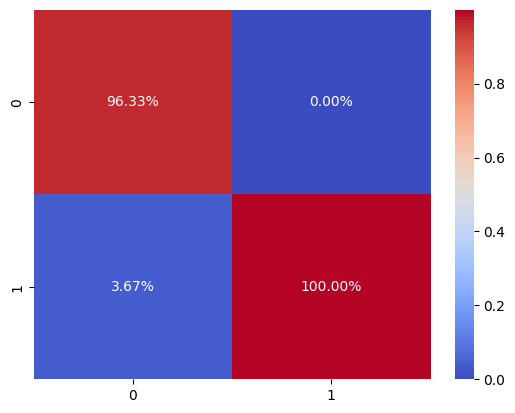

In [ ]:
y_pred_prob = S4_stack.predict_proba(X_test)[0:,1]
y_pred = S4_stack.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred, labels = S4_stack.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

#S5

## Risultati S5 dati balanced VS unbalanced

### *1. Logistic Regression*

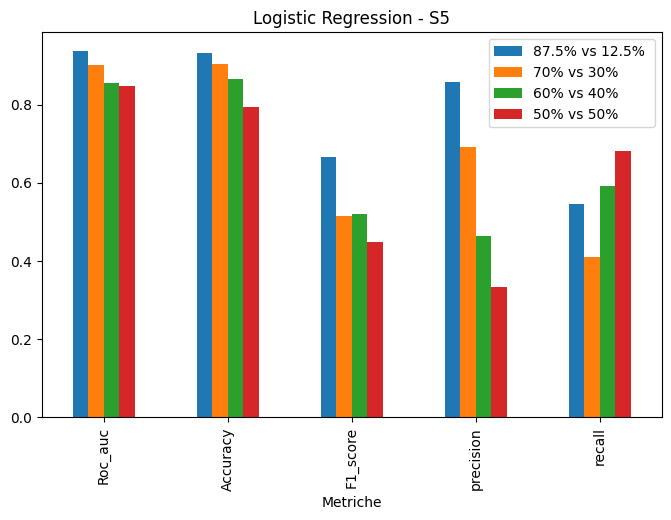

In [ ]:
LR = pd.DataFrame(modelli_S5[0], columns = columns)
LR.Metriche = m.Metriche
LR.plot(x = columns[0], y = columns[1:], kind = "bar", figsize=(8,5))

plot.title("Logistic Regression - S5")
plot.show()

### *2. Random Forest*

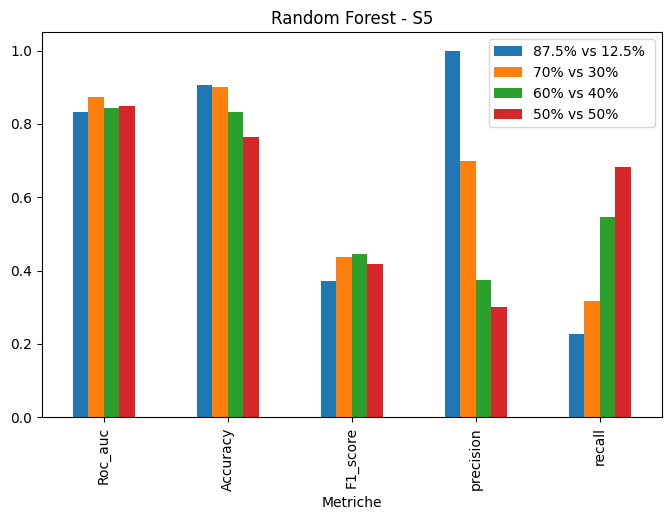

In [ ]:
RF = pd.DataFrame(modelli_S5[1], columns = columns )
RF.Metriche = m.Metriche
RF.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Random Forest - S5")
plot.show()

### *3. Multinomial Naive Bayes*

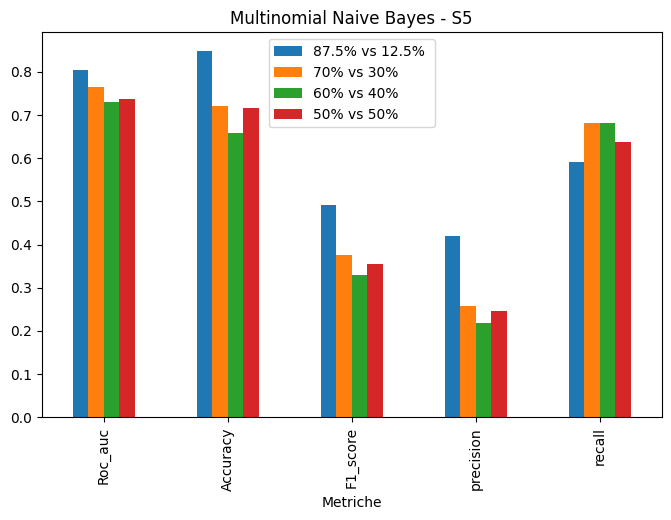

In [ ]:
NBM = pd.DataFrame(modelli_S5[2], columns = columns )
NBM.Metriche = m.Metriche
NBM.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Multinomial Naive Bayes - S5")
plot.show()

### *4. Complement Naive Bayes*

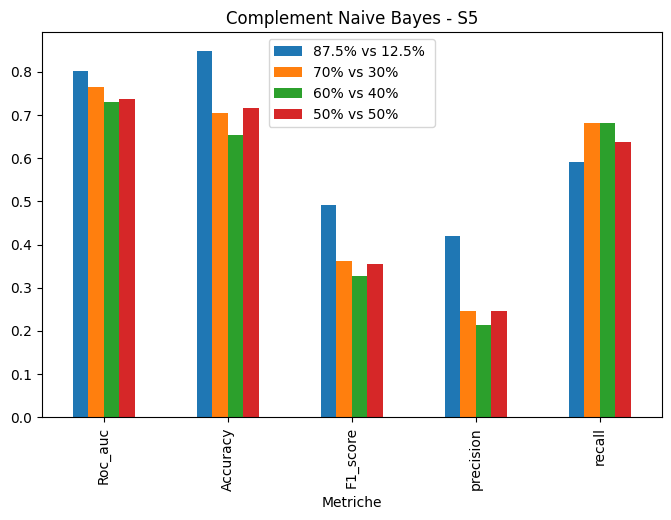

In [ ]:
NBC = pd.DataFrame(modelli_S5[3], columns = columns)
NBC.Metriche = m.Metriche
NBC.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Complement Naive Bayes - S5")
plot.show()

### *5. Linear SVM*

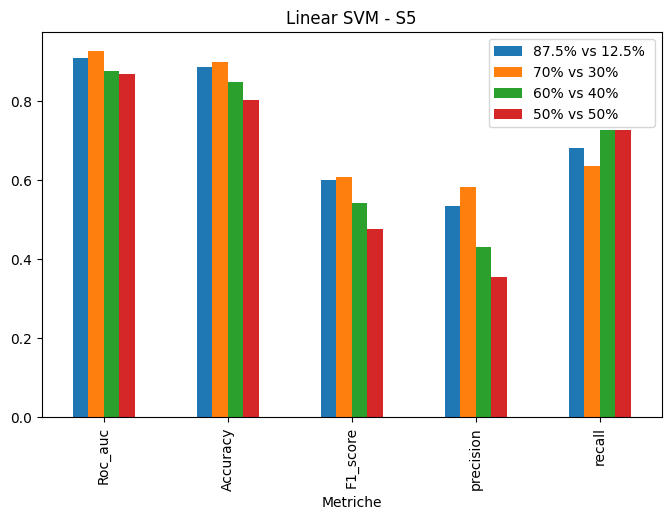

In [ ]:
SVML = pd.DataFrame(modelli_S5[4], columns = columns )
SVML.Metriche = m.Metriche
SVML.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Linear SVM - S5")
plot.show()

### *6. Polinomial SVM*

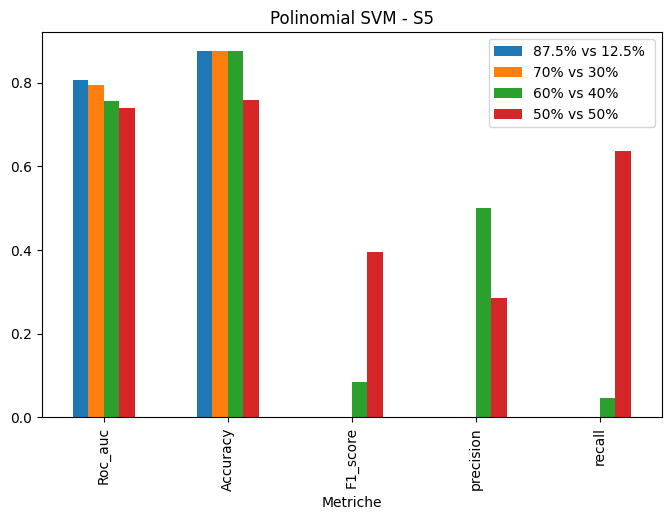

In [ ]:
SVMP = pd.DataFrame(modelli_S5[5], columns = columns )
SVMP.Metriche = m.Metriche
SVMP.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("Polinomial SVM - S5")
plot.show()

### *7. RBF SVM*

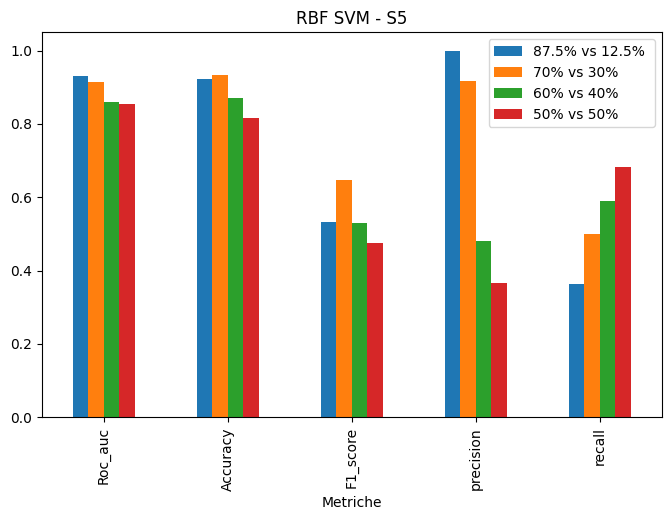

In [ ]:
SVMR = pd.DataFrame(modelli_S5[6], columns = columns)
SVMR.Metriche = m.Metriche
SVMR.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("RBF SVM - S5")
plot.show()

### *8. LDA*

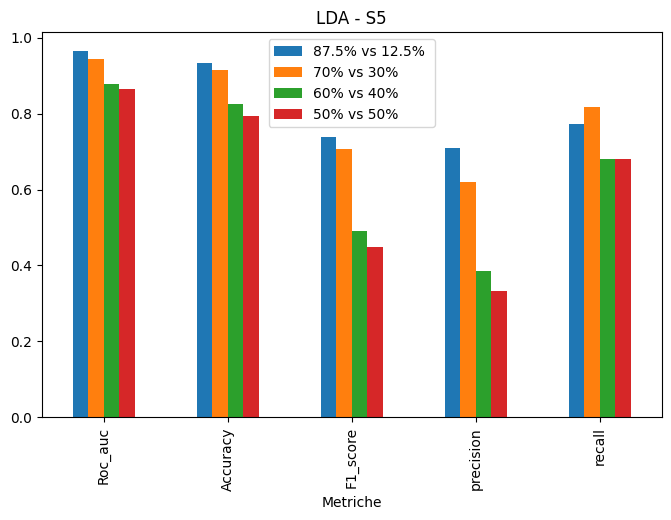

In [ ]:
LDA = pd.DataFrame(modelli_S5[7], columns = columns )
LDA.Metriche = m.Metriche
LDA.plot(x = columns[0], y = columns[1:], kind = "bar",
figsize=(8,5))

plot.title("LDA - S5")
plot.show()

## S5 Ensemble

### Definizione Dataset

In [ ]:
subject = "S5"
file_path = os.path.join(path_mount, path_data, subject)
df = pd.read_json(file_path + "_eeg.json")

pot = df[unicorn_channels].to_numpy()

s = np.zeros(1)
X = np.zeros(2808)

for i in range(pot.shape[0]):
  for j in range(pot.shape[1]):
    temp = np.array(pot[i,j])
    temp = (temp - np.mean(temp)) / np.std(temp)

    s = np.append(s, temp)

  X = np.vstack((X, s[1:]))
  s = np.zeros(1)

y = df.condition.to_numpy()

X = X[1:,:]

# Suddivisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Suddivisione del dataset in set di training e validazione
X_train_original, X_val, y_train_original, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

X_train88 = X_train_original
y_train88 = y_train_original

undersampler = RandomUnderSampler(sampling_strategy = 30/70, random_state = 42)
X_train70, y_train70 = undersampler.fit_resample(X_train_original, y_train_original)

undersampler = RandomUnderSampler(sampling_strategy = 40/60, random_state = 42)
X_train60, y_train60 = undersampler.fit_resample(X_train_original, y_train_original)

### Stacking Classifier

In [ ]:
S5_LR88 = LogisticRegression(C = 0.102, max_iter = 1000)
S5_RF88 = RandomForestClassifier(n_estimators = 875, criterion = 'gini')
S5_SVM_r88 = SVC(C = 2.4210526315789473, kernel = "rbf", class_weight = "balanced", random_state = 42, probability = True)
S5_LDA88 = LinearDiscriminantAnalysis(shrinkage =  0.77777778, solver = 'lsqr')

S5_SVM_l70 = SVC(C = 0.10110909090909091, kernel = "linear", class_weight = "balanced", random_state = 42, probability = True)
S5_LDA70 = LinearDiscriminantAnalysis(shrinkage =  0.66666667, solver = 'lsqr')


S5_SVM_l60 = SVC(C = 0.10110909090909091, kernel = "linear", class_weight = "balanced", random_state = 42, probability = True)

S5_LR88.fit(X_train88, y_train88)
S5_SVM_r88.fit(X_train88, y_train88)
S5_RF88.fit(X_train88, y_train88)
S5_LDA88.fit(X_train88, y_train88)

S5_LDA70.fit(X_train70, y_train70)
S5_SVM_l70.fit(X_train70, y_train70)

S5_SVM_l60.fit(X_train60, y_train60)

SVC(C=0.10110909090909091, class_weight='balanced', kernel='linear',
    probability=True, random_state=42)

In [ ]:
stacking = [
    ('LR88', S5_LR88),
    ('SVM_r88', S5_SVM_r88),
    ('RF88', S5_RF88),
    ('LDA88', S5_LDA88),
    ('SVM_l70', S5_SVM_l70),
    ('LDA70', S5_LDA70),
    ('SVM_l60', S5_SVM_l60),
]

S5_stack = StackingClassifier(estimators = stacking, final_estimator = LogisticRegression(), cv = "prefit")
S5_stack.fit(X_val, y_val)

StackingClassifier(cv='prefit',
                   estimators=[('LR88',
                                LogisticRegression(C=0.102, max_iter=1000)),
                               ('SVM_r88',
                                SVC(C=2.4210526315789473,
                                    class_weight='balanced', probability=True,
                                    random_state=42)),
                               ('RF88',
                                RandomForestClassifier(n_estimators=875)),
                               ('LDA88',
                                LinearDiscriminantAnalysis(shrinkage=0.77777778,
                                                           solver='lsqr')),
                               ('SVM_l70',
                                SVC(C=0.10110909090909091,
                                    class_weight='balanced', kernel='linear',
                                    probability=True, random_state=42)),
                               ('LDA70',
                                LinearDiscriminantAnalysis(shrinkage=0.66666667,
                                                           solver='lsqr')),
                               ('SVM_l60',
                                SVC(C=0.10110909090909091,
                                    class_weight='balanced', kernel='linear',
                                    probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

ROC AUC: 0.9432234432234433
Accuracy: 0.9147982062780269
F1-score: 0.6274509803921569
Precision: 0.6956521739130435
Recall: 0.5714285714285714


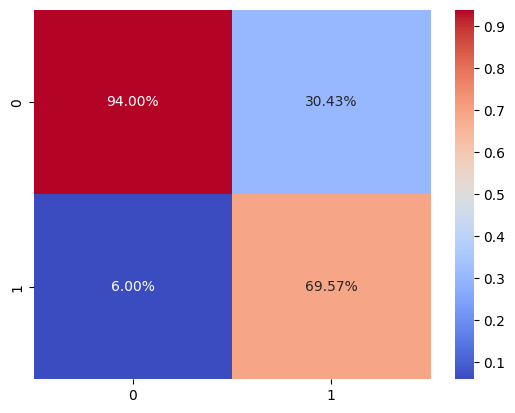

In [ ]:
y_pred_prob = S5_stack.predict_proba(X_test)[0:,1]
y_pred = S5_stack.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred, labels = S5_stack.classes_)


cf_ = cf_matrix.copy().astype(float)

for j in range(2):
  for i in range(2):
    cf_[i,j] = (float(cf_matrix[i,j]) / float(np.sum(cf_matrix[:,j]) + 1e-5))

sns.heatmap(cf_, annot = True, fmt = '.2%', cmap = 'coolwarm')

print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)